In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from astroquery.jplhorizons import Horizons
from astropy.time import Time
import astropy.units as u
from ATATools import ata_ephem
from ATATools import ata_control as ac

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['font.size'] = 14

In [2]:
query = Horizons(
    id='Europa Clipper', location='Hat Creek Observatory (Allen Array)',
    epochs={'start': '2024-10-14T17:35:00', 'stop': '2024-10-14T20:25:00', 'step': '10200'},
)
eph = query.ephemerides()

In [3]:
t = Time(eph['datetime_jd'], format='jd', scale='utc')
t_tai = t.unix_tai
elev = np.array(eph['EL'])
azim = np.array(eph['AZ'])
dist = eph['delta'].to(u.km).value
t_axis = t.datetime

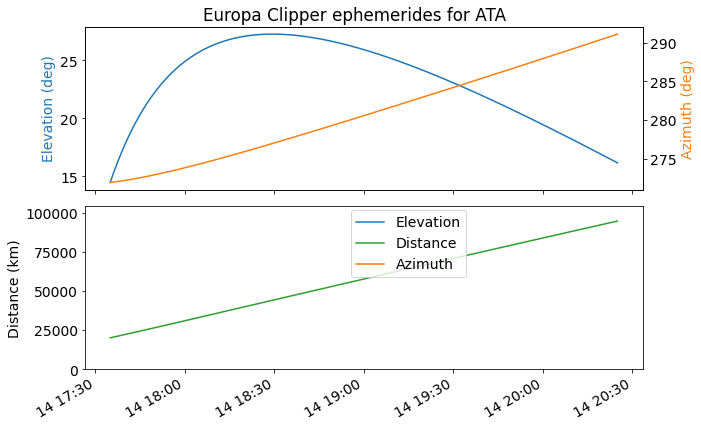

In [4]:
fig, axs = plt.subplots(2, figsize=(10, 7), sharex=True)
axs[0].plot(t_axis, elev, label='Elevation')
axs[0].set_ylabel('Elevation (deg)', color='C0')
#axs[0].set_ylim(0, 90)
ax2 = axs[0].twinx()
ax2.set_ylabel('Azimuth (deg)', color='C1')
ax2.plot(t_axis, azim, color='C1', label='Azimuth')
#ax2.set_ylim(0, 360)
axs[1].plot(t_axis, dist, color='C2', label='Distance')
axs[1].set_ylabel('Distance (km)')
axs[1].set_ylim(0, np.max(dist) * 1.1)
fig.autofmt_xdate()
plt.subplots_adjust(hspace=0.1)
fig.legend(loc=[0.5, 0.35])
plt.suptitle('Europa Clipper ephemerides for ATA', y=0.92);

In [7]:
ir = t_axis.size * [1e-10]
ephem = np.array([t_tai * 1e9, azim, elev, ir], dtype='object').T
ephem_path = '/tmp/europa_clipper.eph'
ata_ephem.ephem_to_txt('/tmp/europa_clipper.eph', ephem)

In [8]:
#eph_id = ac.upload_ephemeris(ephem_path)
#antennas = ['1a']
#ac.track_ephemeris(eph_id, antennas)